# Task -1 Supervised Learning
Name : **Prince Samuvel S**

Role : **Data Science and Business Analyst**



## Linear Regression with Python Scikit Learn
The task is to predict the percentage of an student based on the no. of study hours.
This is a simple linear regression task as it involves just 2 variables

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  

In [2]:
#importing the data
path='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data=pd.read_csv(path)
data.describe

<bound method NDFrame.describe of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [3]:
#Printing the info about the student data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
#Printing the shape of the student data
data.shape

(25, 2)

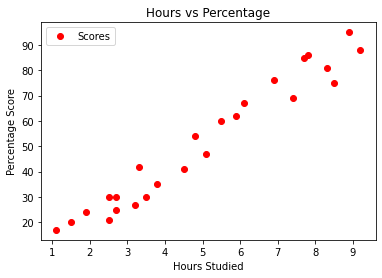

In [5]:
# Plotting the distribution of scores using pyplot
data.plot(x='Hours', y='Scores', style='ro')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

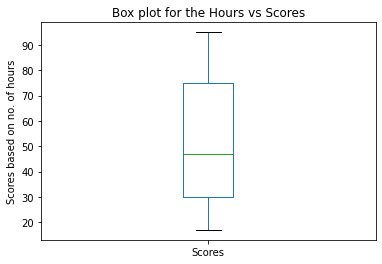

In [6]:
#Plotting the student hours vs percentage using box plot
data_scores = data['Scores']
data_scores.plot(kind='box', figsize=(6, 4))
plt.title('Box plot for the Hours vs Scores')
plt.ylabel('Scores based on no. of hours')
plt.show()

### Plotting the Correlation Matrix

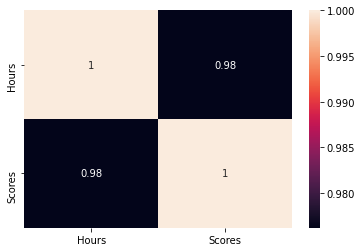

In [7]:
#vizualising the corelation between the data using Seaborn
correlation=data.corr()
sns.heatmap(correlation,annot=True)

## Spliting the Data as Train and Test with 80:20 ratio

In [8]:
#Splititng the data as X and Y
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [9]:
#Spliting the data as test and train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20, 1)
(20,)
(5, 1)
(5,)


## Fitting the Linear Regression Model

In [10]:
#Importing the required library and fitting the linear regression model with the data
from sklearn.linear_model import LinearRegression
model=LinearRegression(normalize=False)
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
#Predicting the values
pred=model.predict(x_test)
print(pred)

[12.44258714 26.35944834 20.39507925 92.9615698  70.09815497]


## Measuring the error using mean absolute error

In [12]:
#Examining the accuracy of our model using mean absolute error
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(pred,y_test))

4.877039354964476


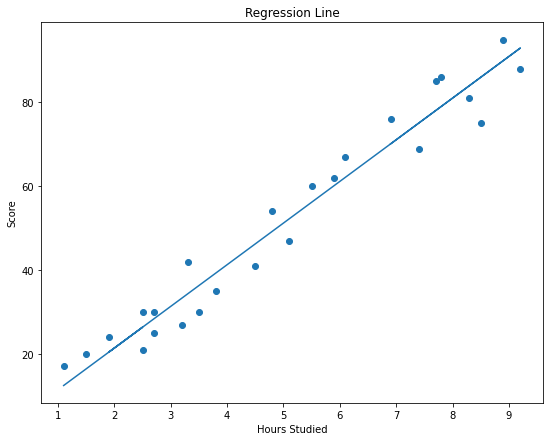

In [13]:
# Plotting for the Regression Line
plt.figure(figsize=(9,7))
plt.scatter(x, y)
plt.plot(x_test, pred);
plt.title("Regression Line")
plt.xlabel('Hours Studied')  
plt.ylabel('Score') 
plt.show()

In [14]:
#Making the Actual Scores, Predicted Scores and Difference in a single data frame
pred=[round(x) for x in pred]
df = pd.DataFrame({'Actual Scores': y_test, 'Predicted Scores': pred, 'Difference':y_test-pred})  
df.head()

,Actual Scores,Predicted Scores,Difference
0,17,12,5
1,21,26,-5
2,24,20,4
3,88,93,-5
4,76,70,6


# Predicting the Score
What will be predicted score if a student studies for 9.25 hrs/ day?

In [15]:
predicted=model.predict([[9.25]])
print("The percentage of marks expected to score by the person is",int(predicted))

The percentage of marks expected to score by the person is 93


Conclusion: From the Mean Absolute Error we can identify a **94%** accuracy for our prediction model